### Stock Market Prediction and Forecasting Using Stacked LSTM

In [24]:
### keras and Tensorflow >2.0

In [25]:
## Data Collection Part
import os
import pandas_datareader as pdr
import pandas as pd

In [26]:
### to access the historical stock data from the internet
df = pdr.get_data_tiingo('AAPL',api_key ='*************************' )
df

C:\Users\HP\Anaconda3\envs\envtensorflow\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close     high     low    open    volume  \
symbol date                                                                   
AAPL   2016-08-11 00:00:00+00:00  107.93  108.930  107.85  108.52  27484506   
       2016-08-12 00:00:00+00:00  108.18  108.440  107.78  107.78  18660434   
       2016-08-15 00:00:00+00:00  109.48  109.540  108.08  108.14  25868209   
       2016-08-16 00:00:00+00:00  109.38  110.230  109.21  109.63  33794448   
       2016-08-17 00:00:00+00:00  109.22  109.370  108.34  109.10  25355976   
...                                  ...      ...     ...     ...       ...   
       2021-08-03 00:00:00+00:00  147.36  148.045  145.18  145.81  64786618   
       2021-08-04 00:00:00+00:00  146.95  147.790  146.28  147.27  56368271   
       2021-08-05 00:00:00+00:00  147.06  147.840  146.17  146.98  46397674   
       2021-08-06 00:00:00+00:00  146.14  147.110  145.63  146.35  54126813   
       2021-08-09 00:00:00+00:00  146.09  146.700  145.52  146.20  48908689   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2016-08-11 00:00:00+00:00   25.300711   25.535129   25.281958   
       2016-08-12 00:00:00+00:00   25.359316   25.420264   25.265548   
       2016-08-15 00:00:00+00:00   25.664059   25.678124   25.335874   
       2016-08-16 00:00:00+00:00   25.640617   25.839872   25.600766   
       2016-08-17 00:00:00+00:00   25.603110   25.638273   25.396822   
...                                      ...         ...         ...   
       2021-08-03 00:00:00+00:00  147.138497  147.822467  144.961774   
       2021-08-04 00:00:00+00:00  146.729113  147.567851  146.060120   
       2021-08-05 00:00:00+00:00  146.838948  147.617775  145.950286   
       2021-08-06 00:00:00+00:00  146.140000  147.110000  145.630000   
       2021-08-09 00:00:00+00:00  146.090000  146.700000  145.520000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2016-08-11 00:00:00+00:00   25.439018  109938024     0.00          1.0  
       2016-08-12 00:00:00+00:00   25.265548   74641736     0.00          1.0  
       2016-08-15 00:00:00+00:00   25.349939  103472836     0.00          1.0  
       2016-08-16 00:00:00+00:00   25.699221  135177792     0.00          1.0  
       2016-08-17 00:00:00+00:00   25.574980  101423904     0.00          1.0  
...                                      ...        ...      ...          ...  
       2021-08-03 00:00:00+00:00  145.590827   64786618     0.00          1.0  
       2021-08-04 00:00:00+00:00  147.048632   56368271     0.00          1.0  
       2021-08-05 00:00:00+00:00  146.759068   46397674     0.00          1.0  
       2021-08-06 00:00:00+00:00  146.350000   54126813     0.22          1.0  
       2021-08-09 00:00:00+00:00  146.200000   48908689     0.00          1.0  

[1257 rows x 12 columns]

In [27]:
df.columns

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [28]:
df.to_csv('AAPL.csv')

In [29]:
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-11 00:00:00+00:00,107.93,108.93,107.85,108.52,27484506,25.300711,25.535129,25.281958,25.439018,109938024,0.0,1.0
1,AAPL,2016-08-12 00:00:00+00:00,108.18,108.44,107.78,107.78,18660434,25.359316,25.420264,25.265548,25.265548,74641736,0.0,1.0
2,AAPL,2016-08-15 00:00:00+00:00,109.48,109.54,108.08,108.14,25868209,25.664059,25.678124,25.335874,25.349939,103472836,0.0,1.0
3,AAPL,2016-08-16 00:00:00+00:00,109.38,110.23,109.21,109.63,33794448,25.640617,25.839872,25.600766,25.699221,135177792,0.0,1.0
4,AAPL,2016-08-17 00:00:00+00:00,109.22,109.37,108.34,109.10,25355976,25.603110,25.638273,25.396822,25.574980,101423904,0.0,1.0


In [30]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-08-03 00:00:00+00:00,147.36,148.045,145.18,145.81,64786618,147.138497,147.822467,144.961774,145.590827,64786618,0.00,1.0
1253,AAPL,2021-08-04 00:00:00+00:00,146.95,147.790,146.28,147.27,56368271,146.729113,147.567851,146.060120,147.048632,56368271,0.00,1.0
1254,AAPL,2021-08-05 00:00:00+00:00,147.06,147.840,146.17,146.98,46397674,146.838948,147.617775,145.950286,146.759068,46397674,0.00,1.0
1255,AAPL,2021-08-06 00:00:00+00:00,146.14,147.110,145.63,146.35,54126813,146.140000,147.110000,145.630000,146.350000,54126813,0.22,1.0
1256,AAPL,2021-08-09 00:00:00+00:00,146.09,146.700,145.52,146.20,48908689,146.090000,146.700000,145.520000,146.200000,48908689,0.00,1.0


In [31]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [32]:
df1 = df.reset_index()['close']

In [33]:
df1

0       107.93
1       108.18
2       109.48
3       109.38
4       109.22
         ...  
1252    147.36
1253    146.95
1254    147.06
1255    146.14
1256    146.09
Name: close, Length: 1257, dtype: float64

In [34]:
df1.shape

(1257,)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

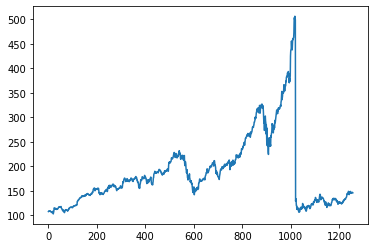

In [36]:
plt.plot(df1)

In [37]:
### LSTM model are very sensitive to the scale of data so, we aplly MinMax scaler wherw we will be tranfering the data 0 to 1

In [38]:
import numpy as np

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [40]:
df1

array([[0.01191185],
       [0.01253226],
       [0.01575839],
       ...,
       [0.10901826],
       [0.10673516],
       [0.10661108]])

In [114]:
df1.shape

(1257, 1)

In [41]:
### spliting the dataset into train and test split(for time series data)
training_size  = int(len(df1) * 0.65)
test_size = int(len(df1) - training_size)
train_data , test_data = df1[0:training_size,:] , df1[training_size:len(df1),:1]

In [42]:
training_size,test_size

(817, 440)

In [43]:
len(train_data)
len(test_data)

440

In [44]:
### Data Preprocessing before fed into LSTM model first we divided the data into X_train,X_test,y_train,y_test

### convert an array of values into a dataset matrix
def create_dataset(dataset,time_stamp=1):
    dataX , dataY = [] ,[]
    for i in range(len(dataset)- time_stamp -1):
        a = dataset[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(dataset[i+time_stamp,0])
    return np.array(dataX),np.array(dataY)

In [45]:
time_stamp = 100
X_train,y_train = create_dataset(train_data,time_stamp)
X_test,y_test = create_dataset(test_data,time_stamp)

In [46]:
X_train.shape , y_train.shape

((716, 100), (716,))

In [47]:
X_test.shape,  y_test.shape

((339, 100), (339,))

In [50]:
## reshape input to be [samples,timestamps,features]  which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [52]:
X_train.shape  ,X_test.shape

((716, 100, 1), (339, 100, 1))

In [53]:
### Create an Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense


In [58]:
### initialize the model
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape =(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1,validation_data=(X_test,y_test))

Epoch 1/100
23/23 [==============================] - 15s 282ms/step - loss: 0.0081 - val_loss: 0.0312
Epoch 2/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0015 - val_loss: 0.0229
Epoch 3/100
23/23 [==============================] - 4s 178ms/step - loss: 6.5603e-04 - val_loss: 0.0236
Epoch 4/100
23/23 [==============================] - 4s 178ms/step - loss: 5.2587e-04 - val_loss: 0.0212
Epoch 5/100
23/23 [==============================] - 5s 227ms/step - loss: 4.5809e-04 - val_loss: 0.0203
Epoch 6/100
23/23 [==============================] - 5s 216ms/step - loss: 4.5787e-04 - val_loss: 0.0204
Epoch 7/100
23/23 [==============================] - 5s 236ms/step - loss: 3.9384e-04 - val_loss: 0.0196
Epoch 8/100
23/23 [==============================] - 5s 209ms/step - loss: 3.7738e-04 - val_loss: 0.0191
Epoch 9/100
23/23 [==============================] - 5s 224ms/step - loss: 3.7329e-04 - val_loss: 0.0195
Epoch 10/100
23/23 [==============================] - 6s 254ms

23/23 [==============================] - 6s 275ms/step - loss: 9.7103e-05 - val_loss: 0.0063
Epoch 79/100
23/23 [==============================] - 7s 291ms/step - loss: 1.0040e-04 - val_loss: 0.0058
Epoch 80/100
23/23 [==============================] - 7s 293ms/step - loss: 1.0373e-04 - val_loss: 0.0059
Epoch 81/100
23/23 [==============================] - 6s 273ms/step - loss: 1.0459e-04 - val_loss: 0.0063
Epoch 82/100
23/23 [==============================] - 6s 276ms/step - loss: 1.0265e-04 - val_loss: 0.0052
Epoch 83/100
23/23 [==============================] - 6s 266ms/step - loss: 9.8850e-05 - val_loss: 0.0051
Epoch 84/100
23/23 [==============================] - 6s 265ms/step - loss: 9.6375e-05 - val_loss: 0.0059
Epoch 85/100
23/23 [==============================] - 6s 272ms/step - loss: 9.4816e-05 - val_loss: 0.0056
Epoch 86/100
23/23 [==============================] - 6s 277ms/step - loss: 9.2333e-05 - val_loss: 0.0051
Epoch 87/100
23/23 [==============================] - 6s 26

In [74]:
### lets do the prediction and check performance metrices
train_predict =  model.predict(X_train)
test_predict = model.predict(X_test)

In [75]:
train_predict

array([[0.0354761 ],
       [0.03519435],
       [0.0352833 ],
       [0.0361649 ],
       [0.03784064],
       [0.03967459],
       [0.04138635],
       [0.04242543],
       [0.04269835],
       [0.04288777],
       [0.04310876],
       [0.04323746],
       [0.04337467],
       [0.04355902],
       [0.04371263],
       [0.04464434],
       [0.04599839],
       [0.04726571],
       [0.04801554],
       [0.04814876],
       [0.05114539],
       [0.0556174 ],
       [0.05997421],
       [0.06363755],
       [0.06662984],
       [0.06886604],
       [0.07038444],
       [0.07107018],
       [0.07172764],
       [0.0732251 ],
       [0.07527356],
       [0.07709928],
       [0.07852405],
       [0.07993024],
       [0.08132818],
       [0.08217034],
       [0.08254993],
       [0.08278699],
       [0.08301068],
       [0.08462292],
       [0.08643784],
       [0.08820368],
       [0.08930364],
       [0.08981781],
       [0.08967055],
       [0.08905248],
       [0.08860967],
       [0.088

In [76]:
test_predict

array([[ 0.32630485],
       [ 0.3181664 ],
       [ 0.33433184],
       [ 0.35409027],
       [ 0.37354717],
       [ 0.38770682],
       [ 0.39940462],
       [ 0.41957453],
       [ 0.4337446 ],
       [ 0.44154316],
       [ 0.4402376 ],
       [ 0.43042314],
       [ 0.41348085],
       [ 0.40926287],
       [ 0.41255745],
       [ 0.4258311 ],
       [ 0.43861255],
       [ 0.44100767],
       [ 0.44692317],
       [ 0.45846233],
       [ 0.46240374],
       [ 0.46490127],
       [ 0.47049943],
       [ 0.47831193],
       [ 0.4869618 ],
       [ 0.49906415],
       [ 0.5128714 ],
       [ 0.5178942 ],
       [ 0.51338536],
       [ 0.5097521 ],
       [ 0.50712186],
       [ 0.5141583 ],
       [ 0.5207347 ],
       [ 0.5306184 ],
       [ 0.5353427 ],
       [ 0.5379539 ],
       [ 0.5365211 ],
       [ 0.53561205],
       [ 0.53567964],
       [ 0.5358291 ],
       [ 0.54014945],
       [ 0.5459242 ],
       [ 0.5514815 ],
       [ 0.55146325],
       [ 0.55901295],
       [ 0

In [77]:
## transformback to original form because previously we had done the scaling now we have to be done reverse scaling beause 
## we have to find the root mean squared metrics
train_prdict = scaler.inverse_transform(train_predict)
test_prdict  = scaler.inverse_transform(test_predict)

In [78]:
train_prdict

array([[117.425446],
       [117.31192 ],
       [117.347755],
       [117.70301 ],
       [118.378265],
       [119.11728 ],
       [119.80705 ],
       [120.225746],
       [120.33573 ],
       [120.412056],
       [120.50111 ],
       [120.55296 ],
       [120.60825 ],
       [120.68254 ],
       [120.74444 ],
       [121.11988 ],
       [121.66551 ],
       [122.17619 ],
       [122.47834 ],
       [122.53202 ],
       [123.739555],
       [125.54159 ],
       [127.29721 ],
       [128.77339 ],
       [129.97917 ],
       [130.88026 ],
       [131.49211 ],
       [131.76845 ],
       [132.03337 ],
       [132.6368  ],
       [133.46223 ],
       [134.19794 ],
       [134.77205 ],
       [135.33868 ],
       [135.90201 ],
       [136.24136 ],
       [136.39432 ],
       [136.48985 ],
       [136.57999 ],
       [137.22964 ],
       [137.961   ],
       [138.67256 ],
       [139.1158  ],
       [139.32298 ],
       [139.26366 ],
       [139.01459 ],
       [138.83615 ],
       [138.7

In [79]:
test_prdict

array([[234.61781 ],
       [231.33833 ],
       [237.85236 ],
       [245.81422 ],
       [253.65457 ],
       [259.36035 ],
       [264.0741  ],
       [272.20175 ],
       [277.91174 ],
       [281.05423 ],
       [280.52814 ],
       [276.57333 ],
       [269.74625 ],
       [268.04657 ],
       [269.37415 ],
       [274.7229  ],
       [279.87332 ],
       [280.83847 ],
       [283.22217 ],
       [287.87198 ],
       [289.4602  ],
       [290.4666  ],
       [292.72244 ],
       [295.87057 ],
       [299.35614 ],
       [304.2329  ],
       [309.79666 ],
       [311.82065 ],
       [310.00378 ],
       [308.5397  ],
       [307.47983 ],
       [310.31525 ],
       [312.96527 ],
       [316.94803 ],
       [318.8517  ],
       [319.90393 ],
       [319.32654 ],
       [318.96024 ],
       [318.9875  ],
       [319.04773 ],
       [320.78864 ],
       [323.11563 ],
       [325.35498 ],
       [325.34766 ],
       [328.38986 ],
       [332.25308 ],
       [339.13748 ],
       [347.9

In [80]:
### Calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_prdict))

178.75082443849277

In [82]:
### test data RMSE
math.sqrt(mean_squared_error(y_test,test_prdict))

230.11503092176292

No handles with labels found to put in legend.


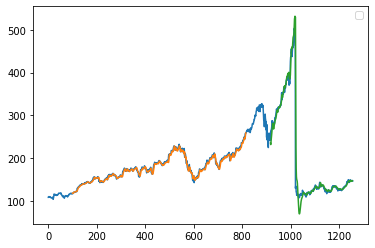

In [86]:
### Plotting 
# shift train predictions for plotting
import numpy as np
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_prdict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_prdict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

In [87]:
### predict the data for 30 days

In [88]:
len(test_data)

440

In [94]:
## here i am taking the previous 100 days data
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [101]:
## data converted into the list
temp_input = list(x_input)
temp_input  = temp_input[0].tolist()

In [102]:
temp_input

[0.04318046456223945,
 0.04184038117927341,
 0.05027794322017076,
 0.048168552709946466,
 0.0420885447687116,
 0.043329362715902375,
 0.044867976970418944,
 0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.06000595592614655,
 0.055340

In [103]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10753961]
101
1 day input [0.04184038 0.05027794 0.04816855 0.04208854 0.04332936 0.04486798
 0.04531467 0.04161703 0.04720071 0.04931011 0.05650685 0.05727616
 0.06147012 0.06757495 0.07411406 0.06975878 0.0776752  0.07171928
 0.07784892 0.07700516 0.07869267 0.07439944 0.07536728 0.07149593
 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765 0.07030474
 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027  0.0588644
 0.05653167 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113
 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644
 0.05496824 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203
 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274
 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847
 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374
 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907
 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792
 0.10675998 0.10489875 0.10837304 0

9 day output [[0.10579211]]
10 day input [0.04931011 0.05650685 0.05727616 0.06147012 0.06757495 0.07411406
 0.06975878 0.0776752  0.07171928 0.07784892 0.07700516 0.07869267
 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488 0.07757594
 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604 0.06196645
 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933 0.05419893
 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596 0.05534048
 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554 0.0524866
 0.05442228 0.05065019 0.05648203 0.05650685 0.05859142 0.05955926
 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368
 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944
 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082
 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488
 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304
 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403
 0.10519655 0.10976276 

18 day output [[0.10561519]]
19 day input [0.07784892 0.07700516 0.07869267 0.07439944 0.07536728 0.07149593
 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765 0.07030474
 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027  0.0588644
 0.05653167 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113
 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644
 0.05496824 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203
 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274
 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847
 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374
 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907
 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792
 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782 0.10829859
 0.10385646 0.10549434 0.1060403  0.10519655 0.10976276 0.10874528
 0.10901826 0.10673516 0.10661108 0.10753961 0.10713995 0.10683154
 0.10659003 0.10638829

27 day output [[0.10558095]]
28 day input [0.07556581 0.07531765 0.07030474 0.07298491 0.06134604 0.06196645
 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933 0.05419893
 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596 0.05534048
 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554 0.0524866
 0.05442228 0.05065019 0.05648203 0.05650685 0.05859142 0.05955926
 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368
 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944
 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082
 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488
 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304
 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403
 0.10519655 0.10976276 0.10874528 0.10901826 0.10673516 0.10661108
 0.10753961 0.10713995 0.10683154 0.10659003 0.10638829 0.10621554
 0.10607014 0.1059522  0.10586048 0.10579211 0.10574303 0.10570883
 0.10568525 0.10566863

In [106]:
day_new = np.arange(1,101)
day_predict  =np.arange(101,131)

In [107]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [108]:
day_predict

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [113]:
df1.shape

(1257, 1)

In [118]:
df3 = df1.tolist()
df3.extend(lst_output)

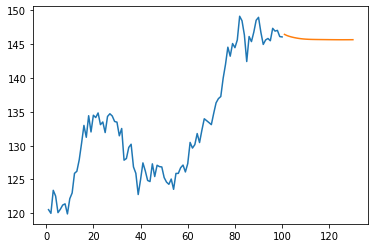

In [119]:
## predict the graph for 30 days
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_predict,scaler.inverse_transform(lst_output))